In [1]:
%matplotlib inline

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris, fetch_20newsgroups

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.decomposition import PCA, TruncatedSVD

# Dimensionality Reduction

PCA - Анализ на основните компоненти

In [3]:
iris = load_iris()

In [4]:
attributes, target = iris["data"], iris["target"]

In [5]:
pca = PCA()

PCA is usupervised algorith.

In [6]:
pca.fit(attributes)

PCA()

In [7]:
pca.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102],
       [-0.58202985,  0.59791083,  0.07623608,  0.54583143],
       [-0.31548719,  0.3197231 ,  0.47983899, -0.75365743]])

In [8]:
pca.mean_

array([5.84333333, 3.05733333, 3.758     , 1.19933333])

In [9]:
transformed_attributes = pca.transform(attributes)

In [10]:
transformed_attributes.shape

(150, 4)

In [11]:
attributes.shape

(150, 4)

Стандартното отклонение:

In [12]:
transformed_attributes.std(axis = 0)

array([2.04940319, 0.49097143, 0.27872586, 0.1538707 ])

Същото нещо само че на квадрат:

In [13]:
transformed_attributes.var(axis = 0)

array([4.20005343, 0.24105294, 0.0776881 , 0.02367619])

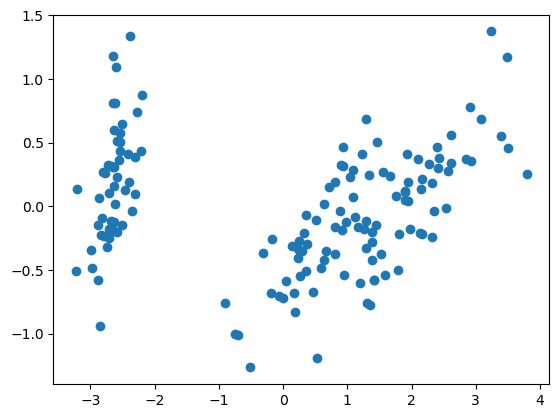

In [14]:
plt.scatter(transformed_attributes[:, 0], transformed_attributes[:, 1])

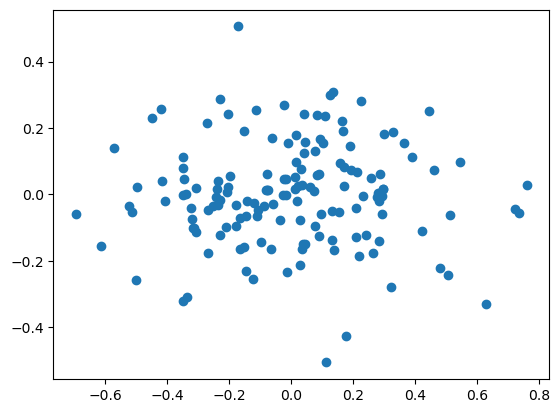

In [15]:
plt.scatter(transformed_attributes[:, 2], transformed_attributes[:, 3])

In [16]:
pca.explained_variance_

array([4.22824171, 0.24267075, 0.0782095 , 0.02383509])

In [17]:
pca.explained_variance_.sum()

4.572957046979865

In [18]:
pca.explained_variance_ratio_

array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

In [19]:
# pca = PCA(n_components = 0.98)

In [20]:
x = np.random.normal(3.5, scale = 3, size = 250)

In [21]:
y = np.random.normal(2.4, scale = 1.4, size = 250)

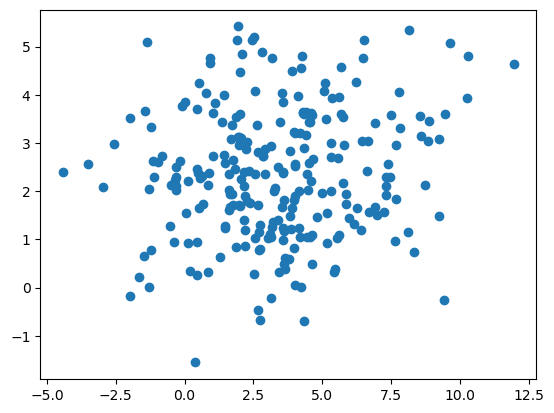

In [22]:
plt.scatter(x, y)

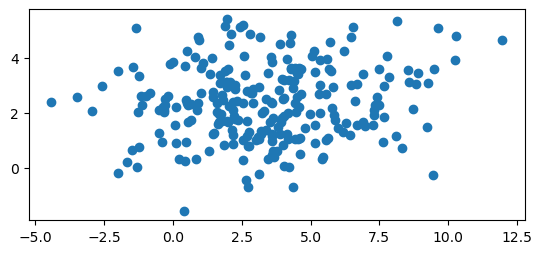

In [23]:
plt.scatter(x, y)
plt.gca().set_aspect("equal")
plt.show()

In [24]:
points = np.array([x, y]).reshape(250, 2)

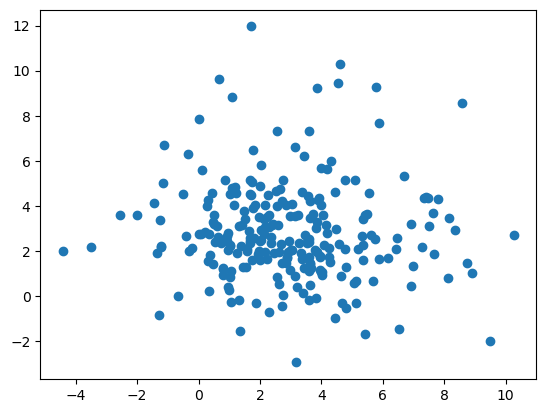

In [25]:
plt.scatter(points[:, 0], points[:, 1])

In [26]:
result = points @ np.array([[1, 0.5], [0.7, 1]]) 

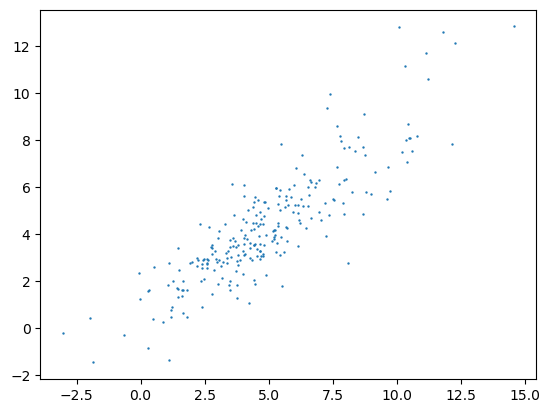

In [27]:
plt.scatter(result[:, 0], result[:, 1], s = 0.5)

In [28]:
data = result.copy()

In [29]:
center = data.mean(axis = 0)

In [30]:
center

array([4.87328688, 4.28199288])

In [31]:
np.cov(data)

array([[ 0.07065337, -0.52706824,  0.46897256, ...,  0.17047912,
         0.04446397, -0.05771701],
       [-0.52706824,  3.93188478, -3.49849589, ..., -1.27175995,
        -0.33169751,  0.43056405],
       [ 0.46897256, -3.49849589,  3.11287694, ...,  1.13158121,
         0.29513642, -0.38310546],
       ...,
       [ 0.17047912, -1.27175995,  1.13158121, ...,  0.41134811,
         0.10728687, -0.13926504],
       [ 0.04446397, -0.33169751,  0.29513642, ...,  0.10728687,
         0.02798232, -0.03632279],
       [-0.05771701,  0.43056405, -0.38310546, ..., -0.13926504,
        -0.03632279,  0.04714924]])

In [32]:
# np.corrcoef(data, rowvar = False)

Матрица на ковариациите:

In [33]:
np.cov(data, rowvar = False)

array([[7.59115768, 5.76788089],
       [5.76788089, 5.84717709]])

In [34]:
covariance_matrix = np.cov(data - center, rowvar = False)

In [35]:
np.linalg.eig(covariance_matrix)

(array([12.5525898 ,  0.88574497]),
 array([[ 0.75811667, -0.65211894],
        [ 0.65211894,  0.75811667]]))

In [36]:
pca.fit(data).components_

array([[ 0.75811667,  0.65211894],
       [ 0.65211894, -0.75811667]])

In [37]:
transformed_data = pca.transform(data)

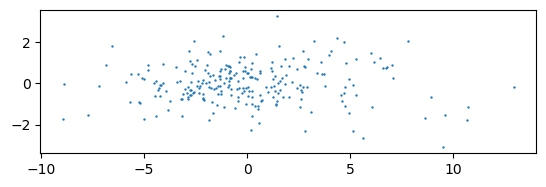

In [38]:
plt.scatter(transformed_data[:, 0], transformed_data[:, 1], s = 0.5)
plt.gca().set_aspect("equal")

In [39]:
pca = PCA(n_components = 1)

In [40]:
pca.fit(data)

PCA(n_components=1)

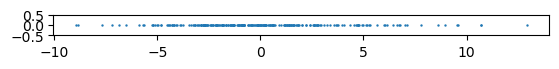

In [41]:
plt.scatter(transformed_data[:, 0], [0] * len(data), s = 0.5)
plt.ylim(-0.5, 0.5)
plt.gca().set_aspect("equal")

Това е dimensionality reduction. Тук данните са в 1 измерение.

In [44]:
texts = fetch_20newsgroups()["data"][:50]

In [45]:
tfidf = TfidfVectorizer()

In [47]:
tfidf.fit(texts)

TfidfVectorizer()

In [48]:
tfidf_results = tfidf.transform(texts)

In [49]:
tfidf_results

<50x3612 sparse matrix of type '<class 'numpy.float64'>'
	with 7607 stored elements in Compressed Sparse Row format>

In [50]:
tfidf_dr = PCA(n_components = 300)

In [52]:
tfidf_dr = TruncatedSVD(n_components = 25)

In [54]:
pca.explained_variance_ratio_

array([0.93408819])

PCA е алгоритъм просто за смяна на базиса, той не губи информация, връща толкова измерения колкото сме имали на входа.